In [23]:
# Importing libraries for working with DataFrames and visualizations
from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Importing the following for working with NILM dataset
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CO, FHMMExact, Hart85, Mean
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk_contrib.disaggregate import Seq2Seq, Seq2Point
from nilmtk.api import API

plt.style.use('ggplot')

In [10]:
# Load model from pickle file
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [47]:
# Import the model
model = import_model('new_models/3sec_99SL.pickle')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2024-04-21 14:13:12         4735
metadata.json                                  2024-04-21 14:13:12           64
variables.h5                                   2024-04-21 14:13:12      5409952
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10


In [51]:
# Function to plot different model's prediction vs ground truth
def plot_result(model):
    plt.rcParams['figure.figsize'] = [15, 10]
    for i in model.gt_overall.columns:
        plt.figure()
        # plt.plot(model.test_mains[0],label='Mains reading')
        plt.plot(model.gt_overall[i],label='Truth')
        # for clf in model.pred_overall:                
        #     plt.plot(model.pred_overall[clf][i],label=clf)
        #     plt.xticks(rotation=90)
        plt.title(i)
        plt.legend()
    plt.show()

In [56]:
# plot_result(model)

model.gt_overall.columns

Index(['fridge', 'air conditioner', 'washing machine', 'tumble dryer',
       'kettle', 'vacuum cleaner', 'electric water heating appliance', 'oven'],
      dtype='object')

Loading data for  test  dataset
Dropping missing values
Generating predictions for : Seq2Seq
24/24 [==============================] - 0s 16ms/step
Generating predictions for : Seq2Point
24/24 [==============================] - 1s 60ms/step
............  mae  ..............
                                     Seq2Seq  Seq2SPoint
fridge                             47.270153   54.324974
air conditioner                    31.579115   40.233498
washing machine                    10.934857    9.884360
tumble dryer                       11.749498   10.811716
kettle                             30.286457   28.125565
vacuum cleaner                    104.486458  142.249496
electric water heating appliance   13.794660    8.357224
oven                               11.159846   22.944204
............  rmse  ..............
                                     Seq2Seq  Seq2SPoint
fridge                             67.143365   73.322556
air conditioner                    44.935706   82.950592
washing

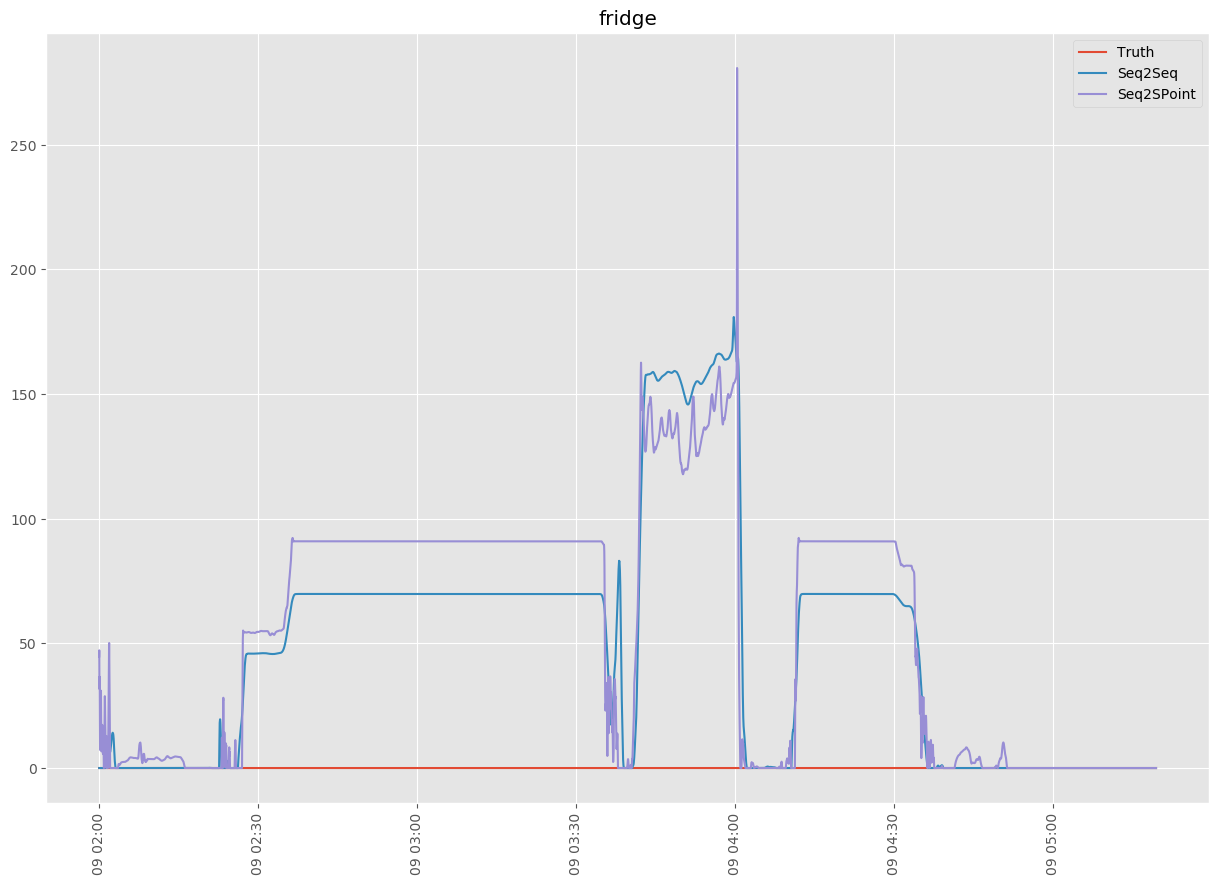

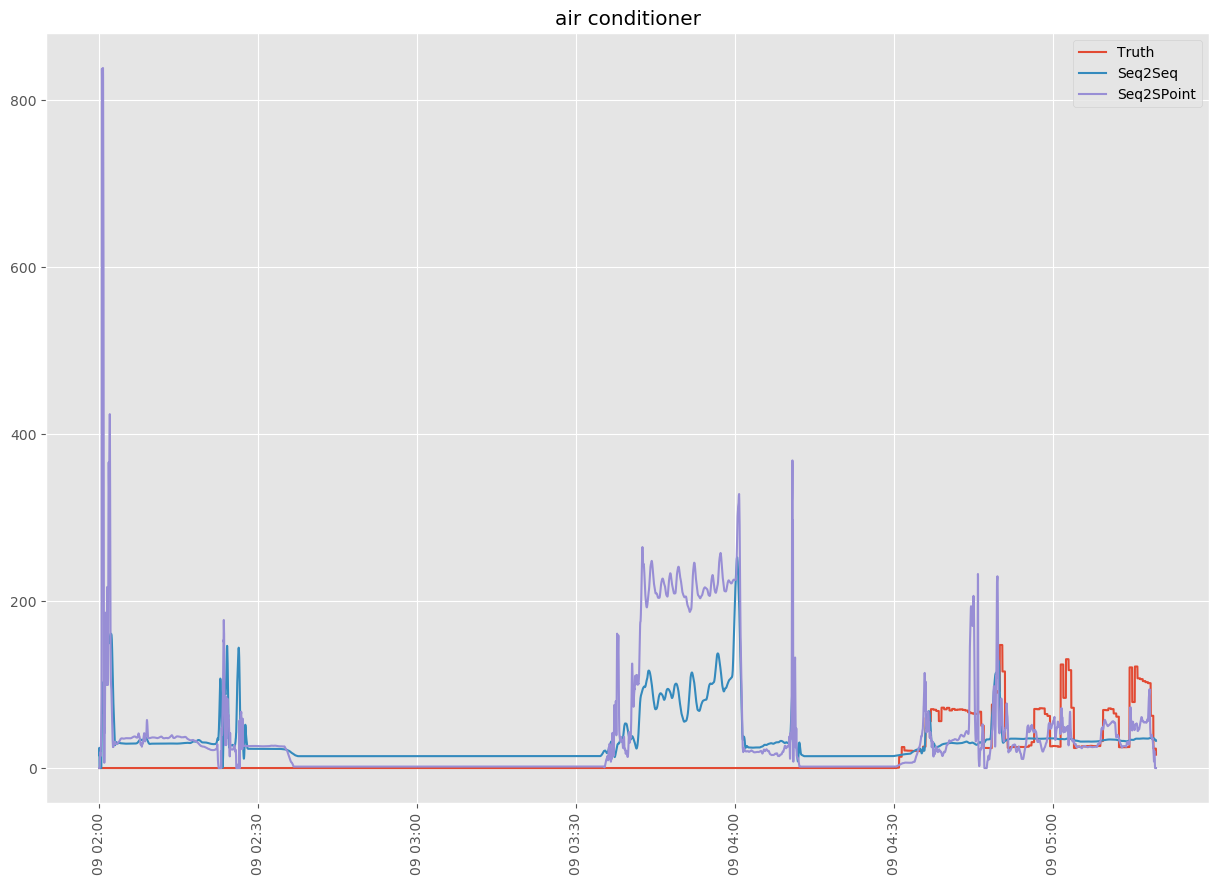

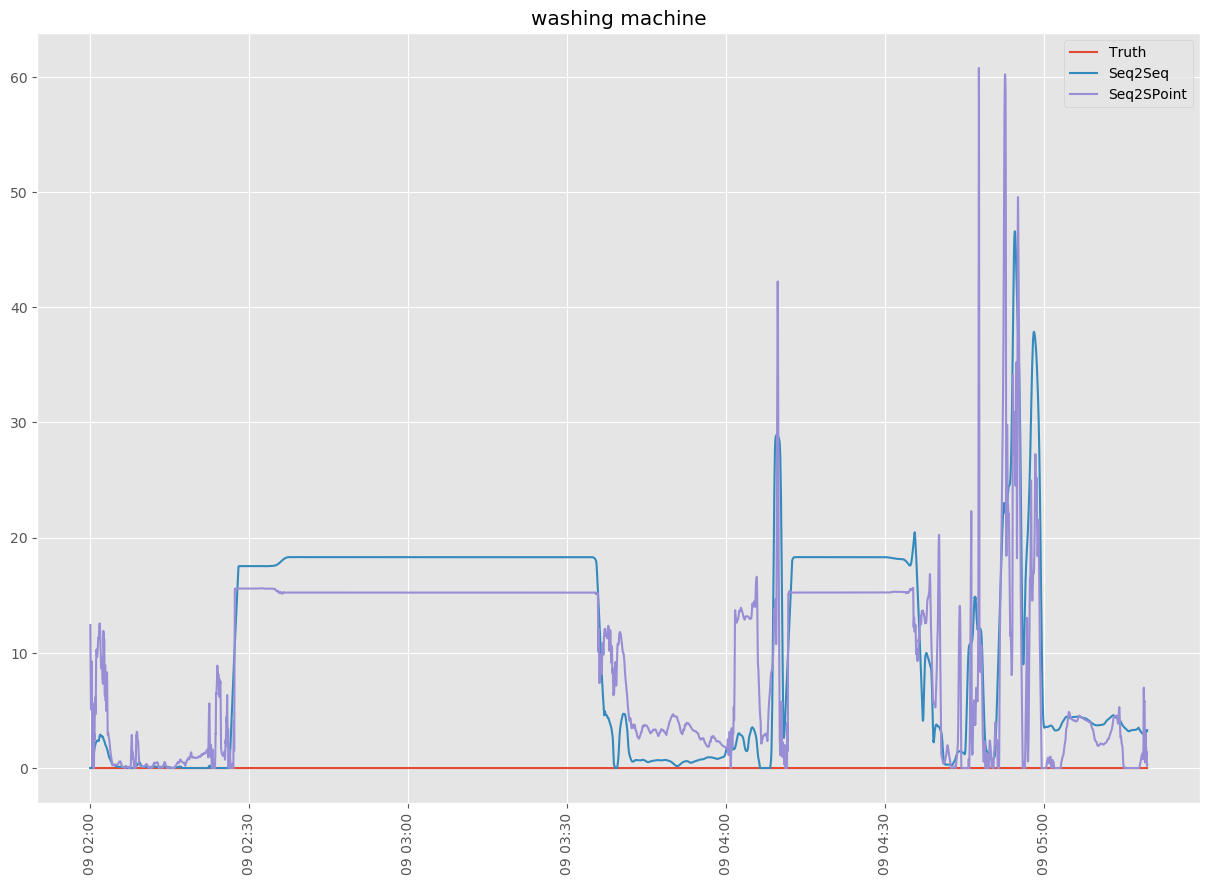

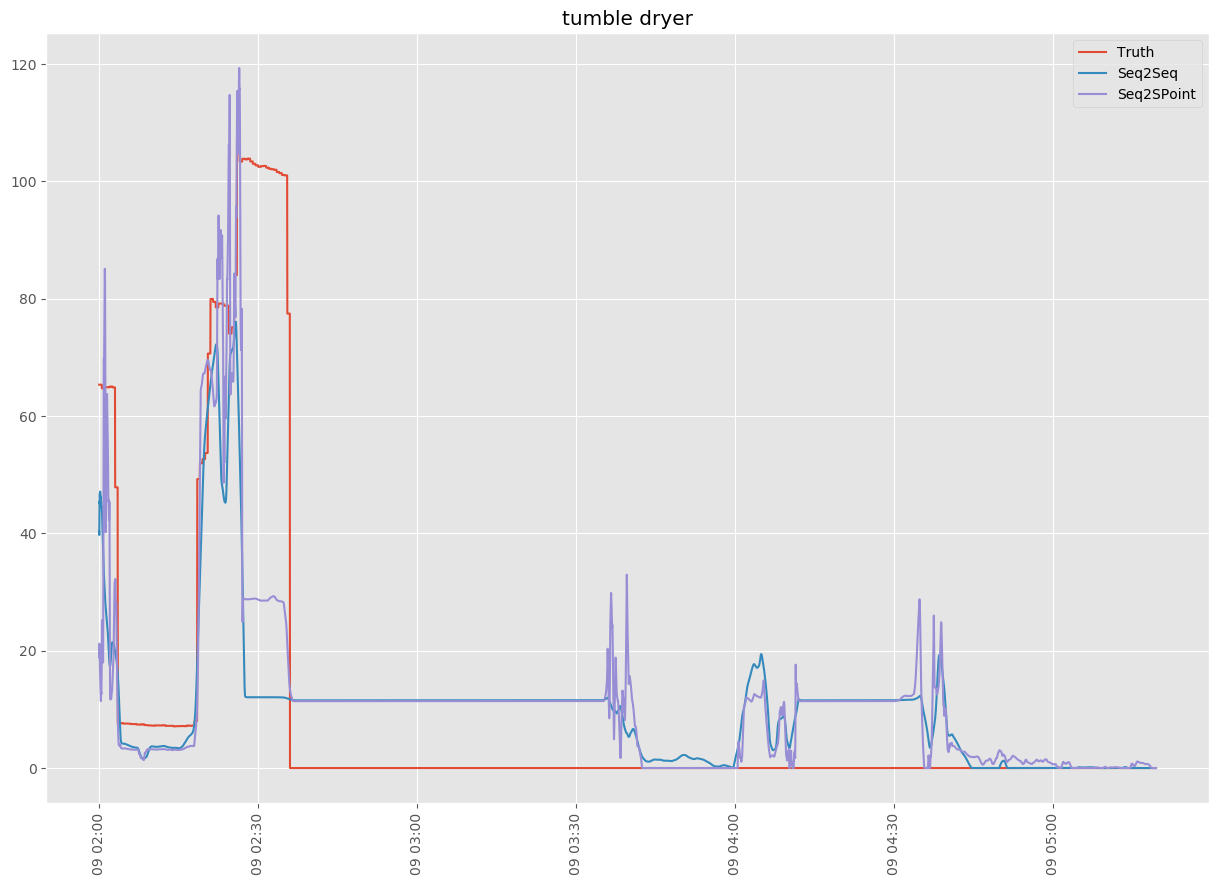

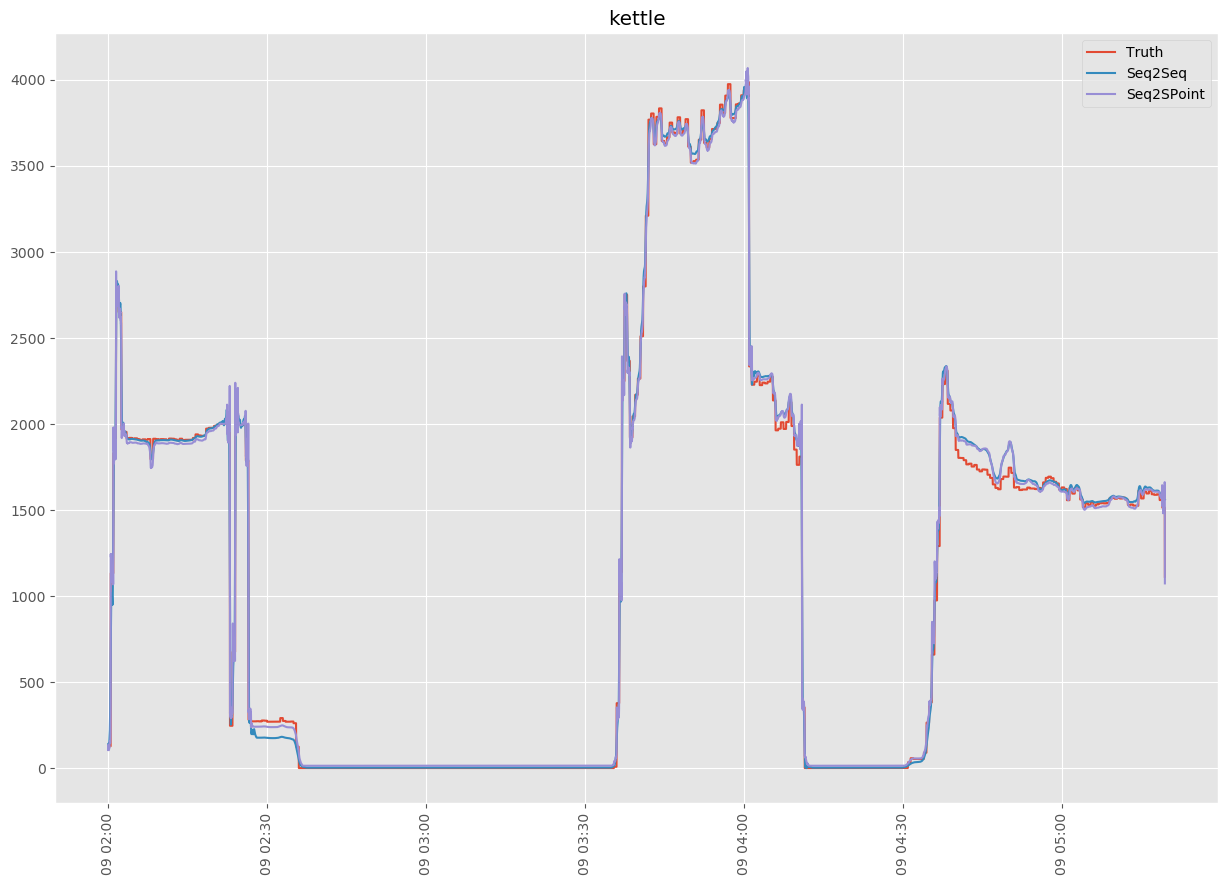

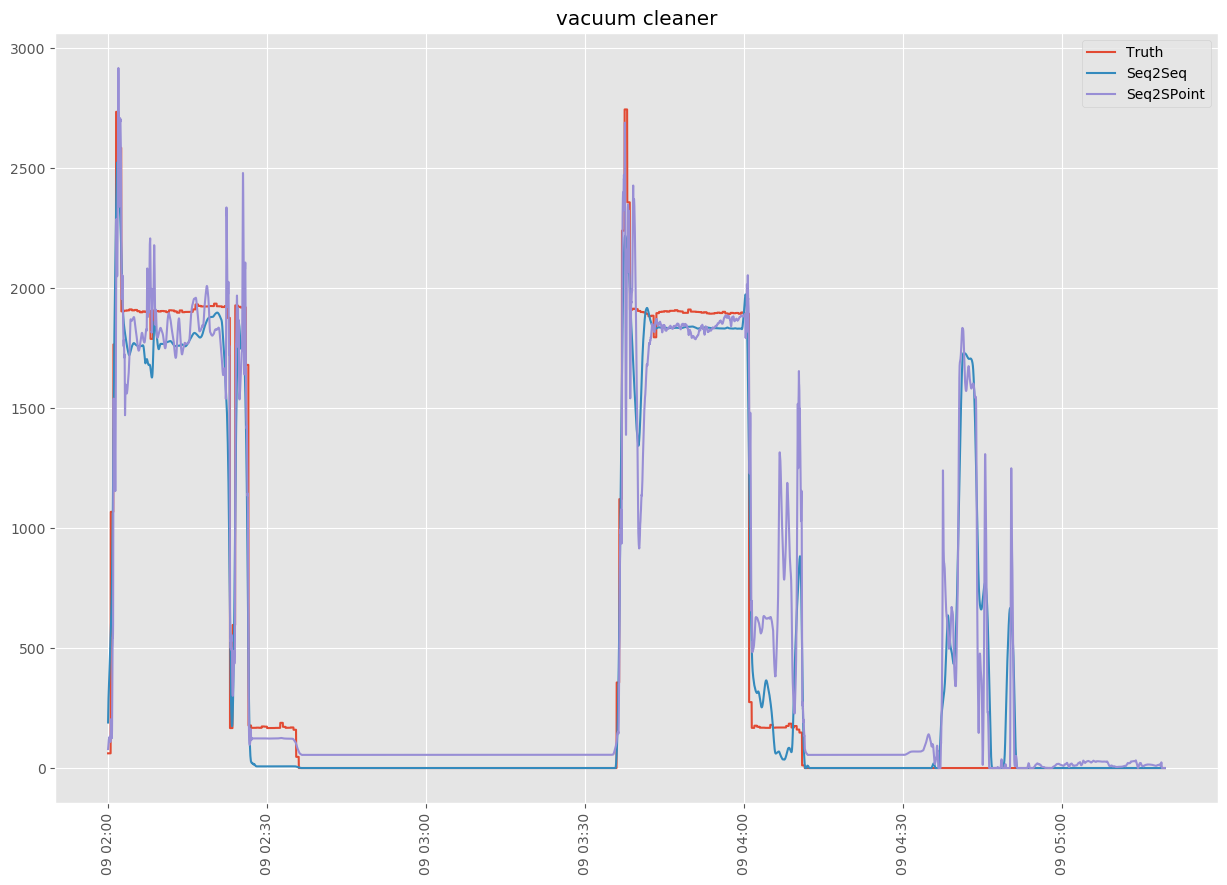

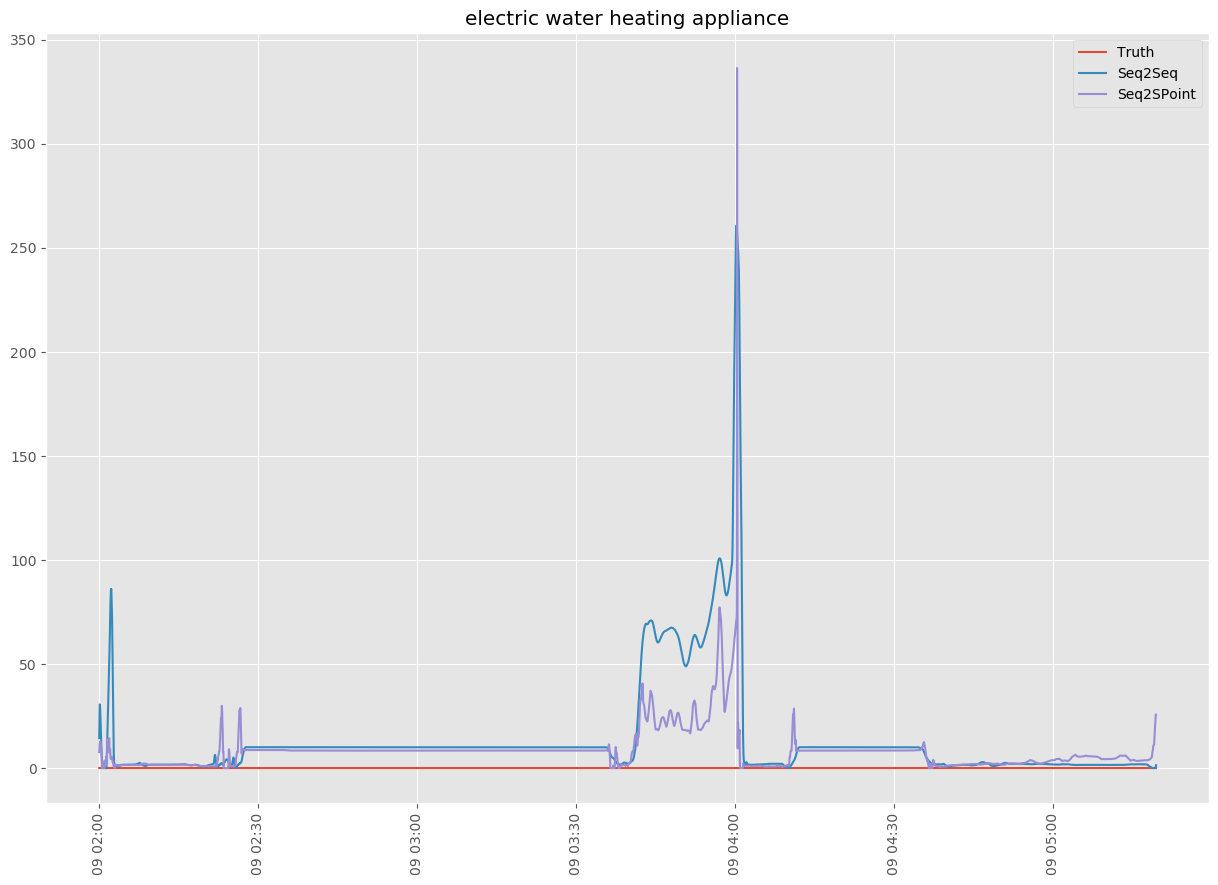

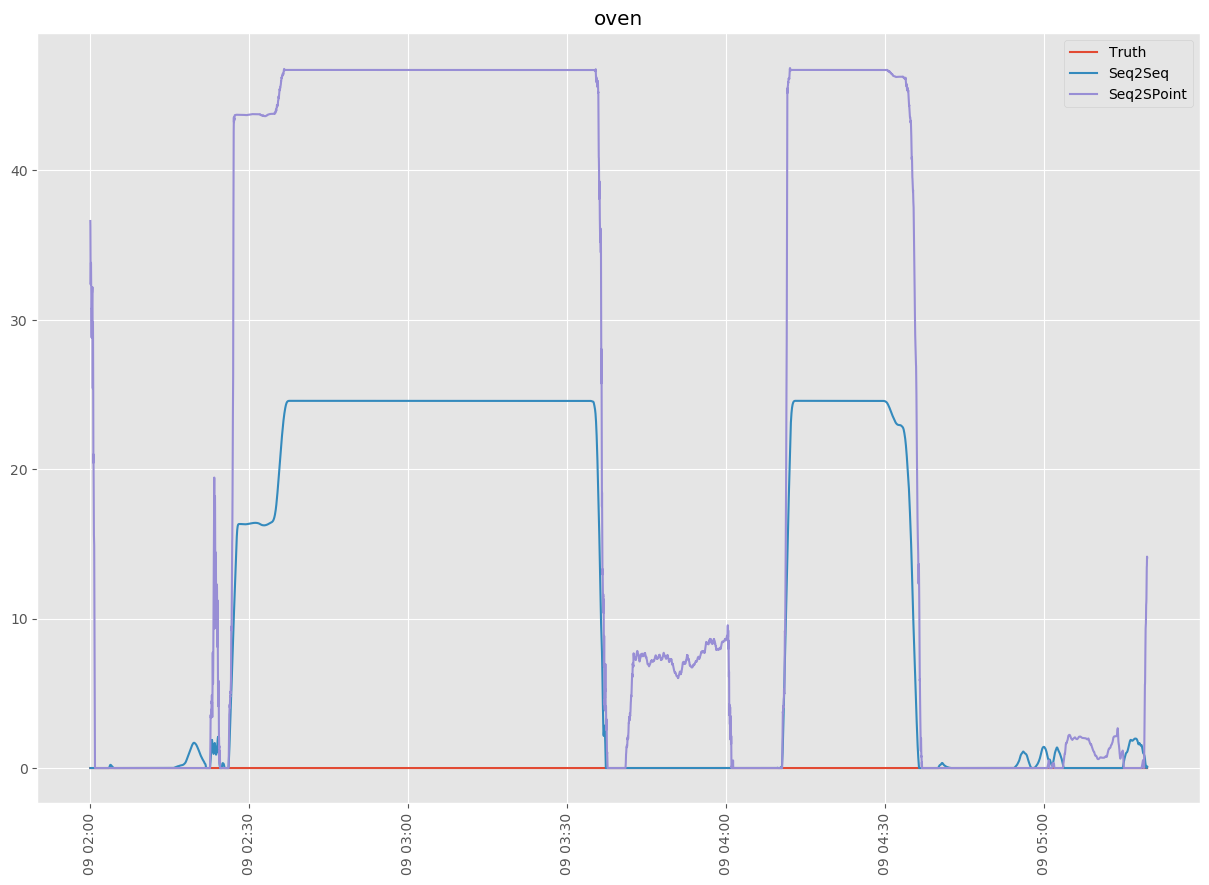

In [43]:
test_params = {
    'path': 'data/mimos_30_sec.h5',
    'buildings': {
        # 1: {
        #     'start_time': '2022-09-27',
        #     'end_time': '2022-09-28'
        # },
        # 2: {
        #     'start_time': '2022-09-29',
        #     'end_time': '2022-09-30'
        # },
        # 3: {
        #     'start_time': '2022-11-01',
        #     'end_time': '2022-11-02'
        # },
        # 4: {
        #     'start_time': '2022-11-07',
        #     'end_time': '2022-11-08'
        # },
        # 5: {
        #     'start_time': '2022-11-08',
        #     'end_time': '2022-11-09'
        # },
        6: {
            'start_time': '2022-11-09',
            'end_time': '2022-11-10'
        },
        # 7: {
        #     'start_time': '2022-11-10',
        #     'end_time': '2022-11-11'
        # }
    }
}

model.test_jointly({'test': test_params})